In [4]:
# 1️⃣ Monta Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Imports principais
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

# 3️⃣ Configs visuais
plt.style.use("seaborn-v0_8-whitegrid")
sns.set()
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')


Mounted at /content/drive


In [5]:
# Caminho da base final integrada (já limpa na Etapa 02)
DATA_PATH = "/content/drive/MyDrive/DataProjects/BKDEP/data/outputs/dados_banco_merged.csv"

# Pasta de exportação de assets desta etapa
ASSETS_PATH = "/content/drive/MyDrive/DataProjects/BKDEP/assets/etapa03_modelagem"
os.makedirs(ASSETS_PATH, exist_ok=True)

# Leitura
df = pd.read_csv(DATA_PATH)

print(f"✅ Base final carregada com sucesso! {df.shape[0]} registros | {df.shape[1]} colunas")
df.info()
df.head(3)


✅ Base final carregada com sucesso! 37421 registros | 29 colunas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37421 entries, 0 to 37420
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    37421 non-null  int64  
 1   profissao                37421 non-null  object 
 2   estado_civil             37421 non-null  object 
 3   educacao                 37421 non-null  object 
 4   credito_em_atraso        37421 non-null  int64  
 5   saldo                    37421 non-null  int64  
 6   emprestimo_habitacional  37421 non-null  int64  
 7   emprestimo_pessoal       37421 non-null  int64  
 8   tipo_contato             37421 non-null  object 
 9   dia                      37421 non-null  int64  
 10  mes                      37421 non-null  object 
 11  duracao                  37421 non-null  int64  
 12  contatos_campanha        37421 non-null  int64  
 13  dias_desde_

,idade,profissao,estado_civil,educacao,credito_em_atraso,saldo,emprestimo_habitacional,emprestimo_pessoal,tipo_contato,dia,...,mes_num,recontato,tempo_recente,Total_Contactados,Total_Convertidos,Receita_Media,Custo_Total,Receita_Total,CPA,ROI
0,18,student,single,nao_informado,0,438,0,0,cellular,1,...,9,0,0,140.0000,39.0000,"1,291.4100",700.0000,"50,365.0000",17.9500,"7,095.0000"
1,18,student,single,secondary,0,156,0,0,cellular,4,...,11,1,82,449.0000,136.0000,"1,387.5500","2,245.0000","188,707.0000",16.5100,"8,305.6600"
2,18,student,single,nao_informado,0,348,0,0,cellular,5,...,5,0,0,140.0000,39.0000,"1,291.4100",700.0000,"50,365.0000",17.9500,"7,095.0000"


In [6]:
# Coluna alvo
target_col = "deposito"

# Garantir que seja binária int (0/1)
df[target_col] = df[target_col].astype(int)

# Features = todas as colunas menos a target
feature_cols = [c for c in df.columns if c != target_col]

print("Target:", target_col)
print("Total de features:", len(feature_cols))
feature_cols


Target: deposito
Total de features: 28


['idade',
 'profissao',
 'estado_civil',
 'educacao',
 'credito_em_atraso',
 'saldo',
 'emprestimo_habitacional',
 'emprestimo_pessoal',
 'tipo_contato',
 'dia',
 'mes',
 'duracao',
 'contatos_campanha',
 'dias_desde_contato',
 'contatos_anteriores',
 'resultado_anterior',
 'status_saldo',
 'faixa_saldo',
 'mes_num',
 'recontato',
 'tempo_recente',
 'Total_Contactados',
 'Total_Convertidos',
 'Receita_Media',
 'Custo_Total',
 'Receita_Total',
 'CPA',
 'ROI']

In [7]:
numeric_features = df[feature_cols].select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df[feature_cols].select_dtypes(include=["object", "category"]).columns.tolist()

print("Features numéricas:", numeric_features)
print("Features categóricas:", categorical_features)

X = df[feature_cols].copy()
y = df[target_col].copy()


Features numéricas: ['idade', 'credito_em_atraso', 'saldo', 'emprestimo_habitacional', 'emprestimo_pessoal', 'dia', 'duracao', 'contatos_campanha', 'dias_desde_contato', 'contatos_anteriores', 'mes_num', 'recontato', 'tempo_recente', 'Total_Contactados', 'Total_Convertidos', 'Receita_Media', 'Custo_Total', 'Receita_Total', 'CPA', 'ROI']
Features categóricas: ['profissao', 'estado_civil', 'educacao', 'tipo_contato', 'mes', 'resultado_anterior', 'status_saldo', 'faixa_saldo']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste :", X_test.shape)
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


Tamanho treino: (29936, 28)
Tamanho teste : (7485, 28)


(deposito
 0   0.8762
 1   0.1238
 Name: proportion, dtype: float64,
 deposito
 0   0.8762
 1   0.1238
 Name: proportion, dtype: float64)

In [9]:
# Pré-processamento numérico
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Pré-processamento categórico
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combina numérico + categórico
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Modelo baseline: Regressão Logística
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

# Pipeline final
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", log_reg)
])

clf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'credito_em_atraso',
                                                   'saldo',
                                                   'emprestimo_habitacional',
                                                   'emprestimo_pessoal', 'dia',
                                                   'duracao',
                                                   'contatos_campanha',
                                                   'dias_desde_contato',
                                                   'contatos_anteriores',
                                                   'mes_num', 'recontato',
                                                   'tempo_recente',
                                                   'Total_Contactados',
                                                   'Total_Convertidos',
                                                   'Receita_Media',
                                                   'Custo_Total',
                                                   'Receita_Total', 'CPA',
                                                   'ROI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['profissao', 'estado_civil',
                                                   'educacao', 'tipo_contato',
                                                   'mes', 'resultado_anterior',
                                                   'status_saldo',
                                                   'faixa_saldo'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1))])

In [10]:
clf.fit(X_train, y_train)
print("✅ Modelo (Regressão Logística) treinado com sucesso!")


✅ Modelo (Regressão Logística) treinado com sucesso!


In [11]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_proba)
}

print("📊 Métricas de desempenho — Reg. Logística\n")
for k, v in metrics.items():
    print(f"{k.upper():10s}: {v:.4f}")

print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


📊 Métricas de desempenho — Reg. Logística

ACCURACY  : 0.8452
PRECISION : 0.4330
RECALL    : 0.8091
F1        : 0.5641
ROC_AUC   : 0.9066

📄 Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      6558
           1       0.43      0.81      0.56       927

    accuracy                           0.85      7485
   macro avg       0.70      0.83      0.73      7485
weighted avg       0.90      0.85      0.86      7485



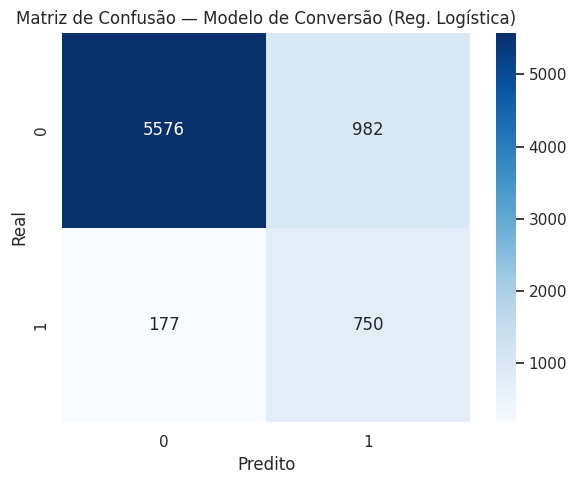

📁 Matriz de confusão salva em: /content/drive/MyDrive/DataProjects/BKDEP/assets/etapa03_modelagem/matriz_confusao_logreg.png


In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão — Modelo de Conversão (Reg. Logística)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()

cm_path = os.path.join(ASSETS_PATH, "matriz_confusao_logreg.png")
plt.savefig(cm_path, dpi=300)
plt.show()

print(f"📁 Matriz de confusão salva em: {cm_path}")


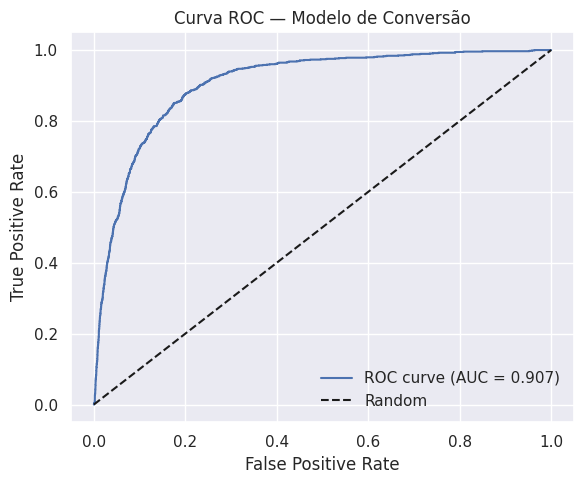

📁 Curva ROC salva em: /content/drive/MyDrive/DataProjects/BKDEP/assets/etapa03_modelagem/curva_roc_logreg.png


In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {metrics['roc_auc']:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC — Modelo de Conversão")
plt.legend(loc="lower right")
plt.tight_layout()

roc_path = os.path.join(ASSETS_PATH, "curva_roc_logreg.png")
plt.savefig(roc_path, dpi=300)
plt.show()

print(f"📁 Curva ROC salva em: {roc_path}")


Top 15 coeficientes positivos:


,feature,coef
49,mes_mar,1.8921
57,resultado_anterior_success,1.5487
6,duracao,1.4878
52,mes_oct,0.9785
53,mes_sep,0.8103
64,faixa_saldo_muito_alto,0.5588
39,tipo_contato_cellular,0.5350
41,tipo_contato_telephone,0.4976
44,mes_dec,0.3890
11,recontato,0.2489


Top 15 coeficientes negativos:


,feature,coef
31,profissao_unemployed,-0.2141
55,resultado_anterior_nao_informado,-0.2229
61,faixa_saldo_baixo,-0.2426
18,CPA,-0.2631
7,contatos_campanha,-0.3293
3,emprestimo_habitacional,-0.3970
65,faixa_saldo_negativo,-0.5774
50,mes_may,-0.5988
56,resultado_anterior_other,-0.6063
54,resultado_anterior_failure,-0.8421


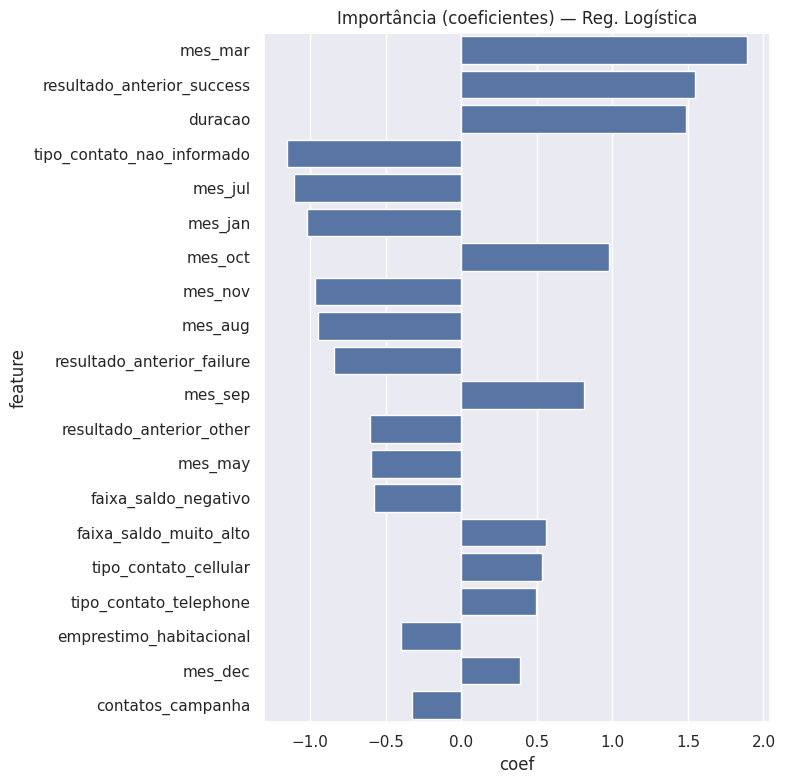

📁 Importância de features salva em: /content/drive/MyDrive/DataProjects/BKDEP/assets/etapa03_modelagem/importancia_features_logreg.png


In [14]:
# Recuperar peças do pipeline
model = clf.named_steps["model"]
pre = clf.named_steps["preprocessor"]

# Nomes numéricos
num_cols_out = numeric_features

# Nomes categóricos após OneHotEncoder
cat_encoder = pre.named_transformers_["cat"].named_steps["onehot"]
cat_cols_out = cat_encoder.get_feature_names_out(categorical_features)

feature_names = np.concatenate([num_cols_out, cat_cols_out])
coefs = model.coef_[0]

feat_importance = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs
}).sort_values("coef", ascending=False)

print("Top 15 coeficientes positivos:")
display(feat_importance.head(15))

print("Top 15 coeficientes negativos:")
display(feat_importance.tail(15))

# Top 20 por valor absoluto
top_abs = feat_importance.reindex(
    feat_importance["coef"].abs().sort_values(ascending=False).index
).head(20)

plt.figure(figsize=(8, 8))
sns.barplot(
    data=top_abs,
    x="coef",
    y="feature"
)
plt.title("Importância (coeficientes) — Reg. Logística")
plt.tight_layout()

feat_path = os.path.join(ASSETS_PATH, "importancia_features_logreg.png")
plt.savefig(feat_path, dpi=300)
plt.show()

print(f"📁 Importância de features salva em: {feat_path}")


In [15]:
pred_df = X_test.copy()
pred_df["real"] = y_test.values
pred_df["proba_conversao"] = y_proba
pred_df["predito"] = y_pred

pred_output_path = "/content/drive/MyDrive/DataProjects/BKDEP/data/outputs/predicoes_modelo_logistico.csv"
os.makedirs(os.path.dirname(pred_output_path), exist_ok=True)

pred_df.to_csv(pred_output_path, index=False)

print(f"📁 Tabela de previsões exportada para: {pred_output_path}")
pred_df.head()


📁 Tabela de previsões exportada para: /content/drive/MyDrive/DataProjects/BKDEP/data/outputs/predicoes_modelo_logistico.csv


,idade,profissao,estado_civil,educacao,credito_em_atraso,saldo,emprestimo_habitacional,emprestimo_pessoal,tipo_contato,dia,...,Total_Contactados,Total_Convertidos,Receita_Media,Custo_Total,Receita_Total,CPA,ROI,real,proba_conversao,predito
23141,44,blue-collar,single,nao_informado,0,0,1,0,nao_informado,23,...,83.0000,7.0000,"2,030.7100",415.0000,"14,215.0000",59.2900,"3,325.3000",0,0.0543,0
3120,28,management,single,tertiary,0,730,1,0,cellular,26,...,"2,094.0000",382.0000,"2,196.3400","10,470.0000","839,003.0000",27.4100,"7,913.4000",0,0.1372,0
22048,43,blue-collar,married,primary,0,0,1,0,nao_informado,3,...,"2,020.0000",103.0000,"1,419.0300","10,100.0000","146,160.0000",98.0600,"1,347.1300",0,0.0299,0
15872,37,services,married,secondary,0,4760,1,0,cellular,20,...,"1,711.0000",127.0000,"1,459.9100","8,555.0000","185,408.0000",67.3600,"2,067.2500",0,0.1663,0
35150,59,admin.,married,primary,0,879,1,0,cellular,30,...,134.0000,7.0000,805.5700,670.0000,"5,639.0000",95.7100,741.6400,0,0.0468,0


In [16]:
import os

ASSETS_PATH = "/content/drive/MyDrive/DataProjects/BKDEP/assets/etapa03_modelagem"

print("📁 Conteúdo da pasta de assets da Etapa 03:\n")
for root, dirs, files in os.walk(ASSETS_PATH):
    for file in files:
        print(" -", file)


📁 Conteúdo da pasta de assets da Etapa 03:

 - matriz_confusao_logreg.png
 - curva_roc_logreg.png
 - importancia_features_logreg.png


In [17]:
features_cluster = ["ROI", "CPA", "Receita_Total", "Custo_Total"]

df_cluster = df[features_cluster].copy()

print("Shape:", df_cluster.shape)
df_cluster.describe()


Shape: (37421, 4)


,ROI,CPA,Receita_Total,Custo_Total
count,"37,421.0000","37,421.0000","37,421.0000","37,421.0000"
mean,"4,417.0928",48.3678,"283,208.3896","6,741.6965"
std,"3,573.1511",20.4526,"286,902.5654","5,198.1399"
min,-65.5600,13.3300,62.0000,150.0000
25%,"2,067.2500",35.6700,"65,269.0000","2,100.0000"
50%,"3,358.1200",44.1700,"188,707.0000","5,245.0000"
75%,"5,411.2400",61.5300,"373,379.0000","10,470.0000"
max,"32,800.2700",133.7500,"941,596.0000","17,085.0000"


In [18]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set()

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


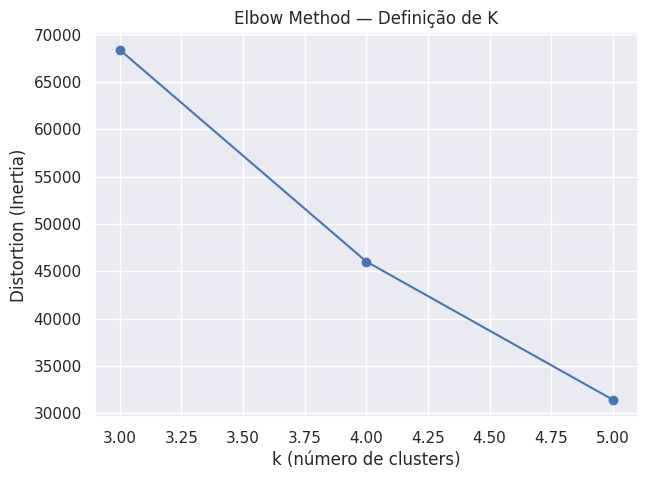

📁 Elbow salvo em: /content/drive/MyDrive/DataProjects/BKDEP/assets/etapa03_modelagem/elbow_method.png


In [20]:
distortions = []
K = range(3, 6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, distortions, marker='o')
plt.title("Elbow Method — Definição de K")
plt.xlabel("k (número de clusters)")
plt.ylabel("Distortion (Inertia)")
plt.grid(True)

elbow_path = f"{ASSETS_PATH}/elbow_method.png"
plt.savefig(elbow_path, dpi=300)
plt.show()

print("📁 Elbow salvo em:", elbow_path)


In [21]:
best_k = 3   # ajuste se achar necessário

kmeans_final = KMeans(n_clusters=best_k, random_state=42)
df["Cluster"] = kmeans_final.fit_predict(X_scaled)

print("Clusters adicionados!")
df["Cluster"].value_counts()


Clusters adicionados!


,count
Cluster,
1,16231
2,13270
0,7920


In [22]:
cluster_table = df.groupby("Cluster")[["ROI", "CPA"]].mean()
cluster_table["Quantidade"] = df["Cluster"].value_counts()
cluster_table = cluster_table.sort_index()

cluster_table_path = f"{ASSETS_PATH}/tabela_clusters_rentabilidade.csv"
cluster_table.to_csv(cluster_table_path, index=True)

print("📁 Tabela salva em:", cluster_table_path)
cluster_table


📁 Tabela salva em: /content/drive/MyDrive/DataProjects/BKDEP/assets/etapa03_modelagem/tabela_clusters_rentabilidade.csv


,ROI,CPA,Quantidade
Cluster,,,
0,"5,448.3053",37.4099,7920
1,"5,987.2260",35.9202,16231
2,"1,881.1445",70.1330,13270


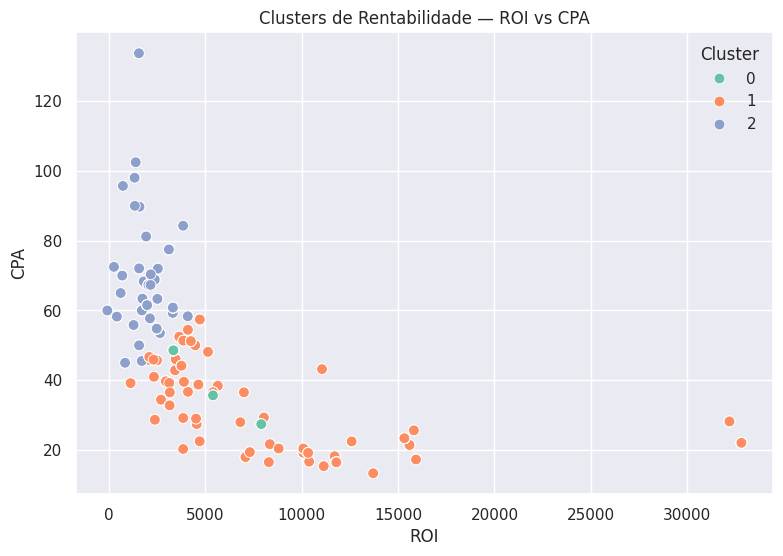

📁 Gráfico salvo em: /content/drive/MyDrive/DataProjects/BKDEP/assets/etapa03_modelagem/scatter_roi_cpa_clusters.png


In [23]:
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df,
    x="ROI",
    y="CPA",
    hue="Cluster",
    palette="Set2",
    s=60
)

plt.title("Clusters de Rentabilidade — ROI vs CPA")
plt.xlabel("ROI")
plt.ylabel("CPA")
plt.grid(True)

scatter_path = f"{ASSETS_PATH}/scatter_roi_cpa_clusters.png"
plt.savefig(scatter_path, dpi=300)
plt.show()

print("📁 Gráfico salvo em:", scatter_path)


In [24]:
EXPORT_PATH = "/content/drive/MyDrive/DataProjects/BKDEP/data/outputs/dados_banco_clusterizado.csv"

df.to_csv(EXPORT_PATH, index=False)
print("🎉 Base final com clusters salva em:", EXPORT_PATH)


🎉 Base final com clusters salva em: /content/drive/MyDrive/DataProjects/BKDEP/data/outputs/dados_banco_clusterizado.csv


In [25]:
%cd /content/drive/MyDrive/DataProjects/BKDEP


/content/drive/MyDrive/DataProjects/BKDEP


In [26]:
!ls


assets					  docs
BK_DEP_BASE_100_PORCENTO_INTEGRADA.csv	  notebooks
BK_DEP_BASE_FINAL_100PORCENTO_PRONTA.csv  README.md
dados_banco_clean.csv			  requirements.txt
dados_banco.csv				  scripts
dados_banco_merged.csv			  tabela_roi_final_otimizada.csv
data


In [27]:
!git status


Refresh index: 100% (16/16), done.
On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebooks/02_analise_exploratoria.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	assets/etapa03_modelagem/
	notebooks/03_modelagem.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
